In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.io.arff import loadarff

In [2]:
SEED = 1

raw_data = loadarff('../dataset/Rice_Cammeo_Osmancik.arff')
df_data = pd.DataFrame(raw_data[0])

scaler = MinMaxScaler(feature_range=(0, 1))
x_data_raw = scaler.fit_transform(df_data.iloc[:, :-1])
y_data_raw = [0 if x.decode("utf-8") == "Cammeo" else 1 for x in df_data.iloc[:, -1]]

X_train, X_test, y_train, y_test = train_test_split(x_data_raw, y_data_raw, test_size=0.95, stratify=y_data_raw, random_state=SEED)

In [3]:
clf = DecisionTreeClassifier(random_state=42, max_depth=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [4]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9234806629834255
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1549
           1       0.91      0.96      0.93      2071

    accuracy                           0.92      3620
   macro avg       0.93      0.92      0.92      3620
weighted avg       0.92      0.92      0.92      3620

Confusion Matrix:
[[1356  193]
 [  84 1987]]


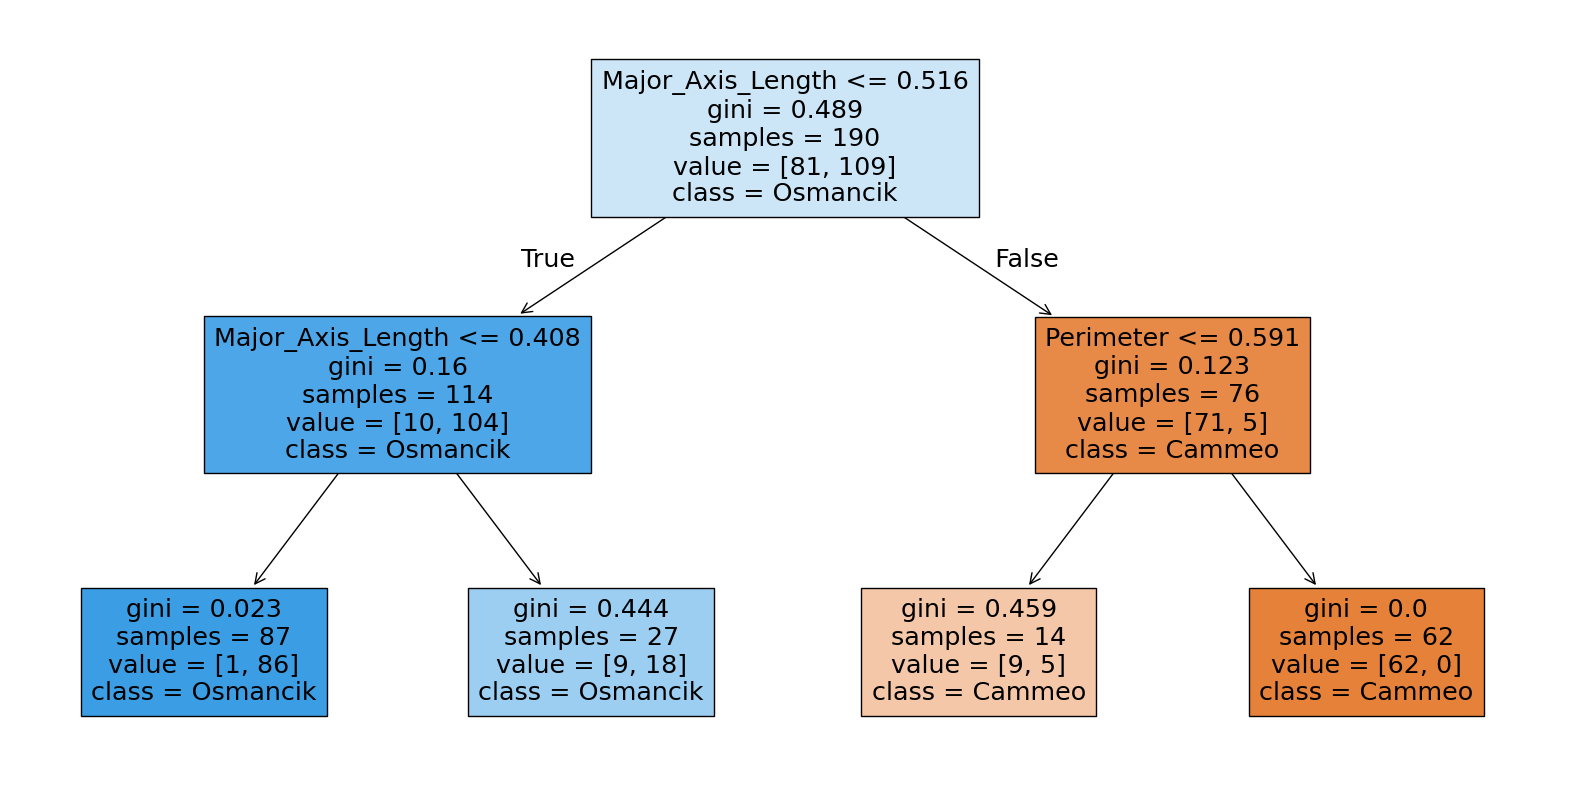

In [5]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=df_data.columns[:-1], class_names=['Cammeo', 'Osmancik'], max_depth=2)
plt.show()